In [2]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt
import seaborn as sns
dataset = pd.read_csv('/Users/yashwanththota/Downloads/Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


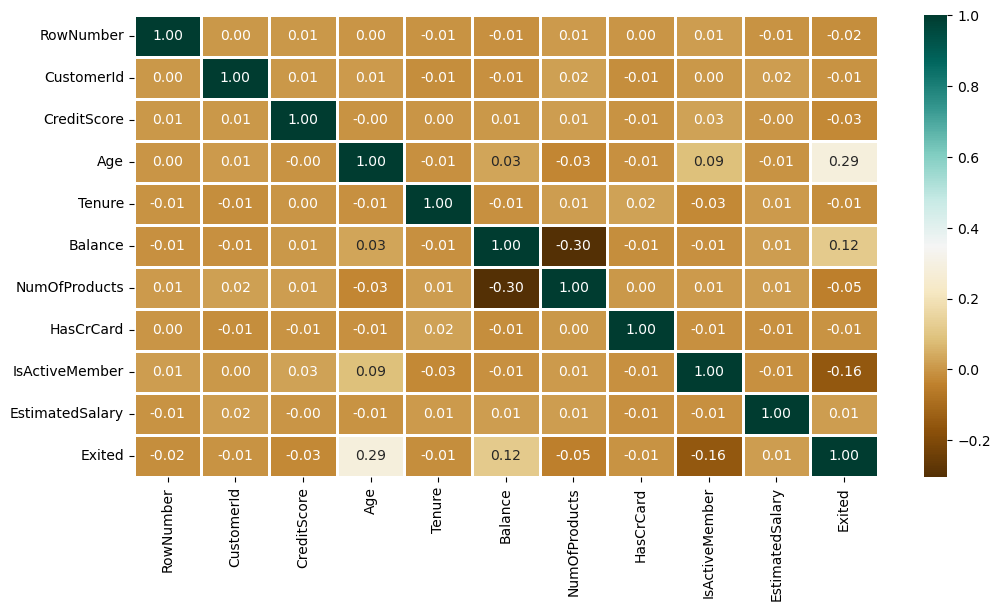

In [4]:
plt.figure(figsize=(12,6)) 
numeric_dataset = dataset.select_dtypes(include=[np.number])
sns.heatmap(numeric_dataset.corr(), cmap='BrBG', fmt='.2f', linewidths=2, annot=True)
plt.show()


/var/folders/5h/704w5gn12zq0bnnw6w73c6x40000gn/T/ipykernel_15041/2343357852.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[i])
/var/folders/5h/704w5gn12zq0bnnw6w73c6x40000gn/T/ipykernel_15041/2343357852.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[i])
/var/folders/5h/

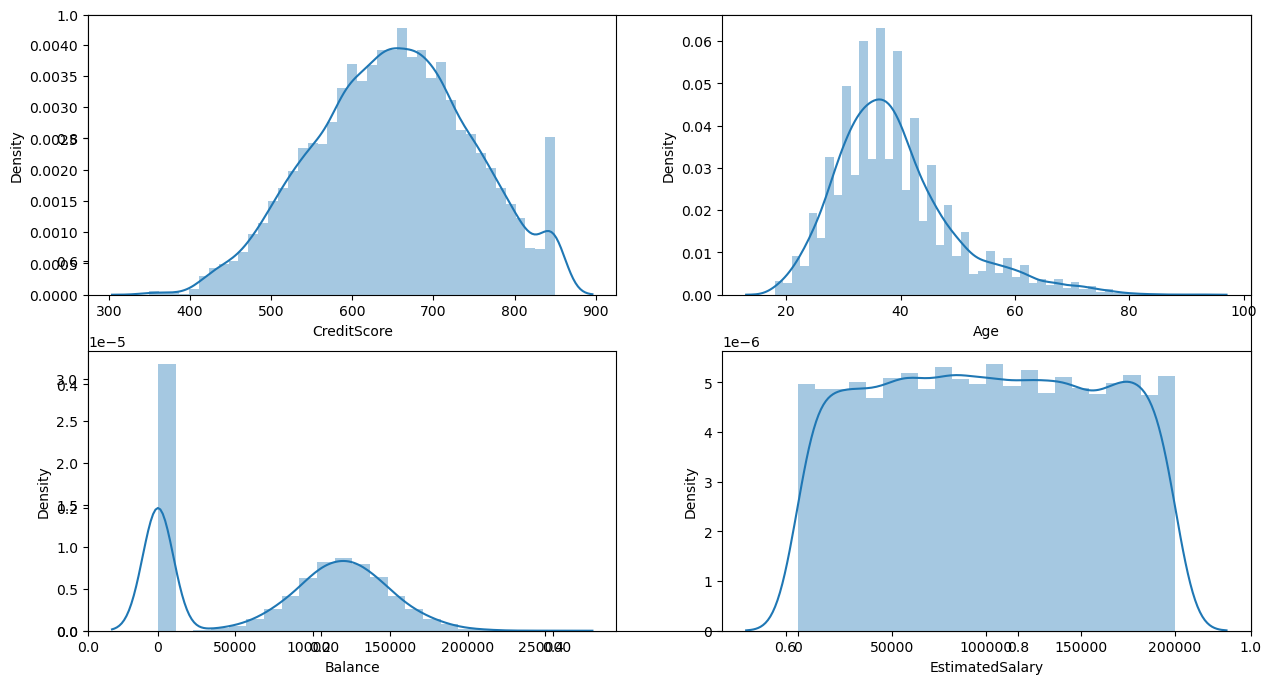

In [5]:
lis = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary'] 
plt.subplots(figsize=(15, 8)) 
index = 1
  
for i in lis: 
    plt.subplot(2, 2, index) 
    sns.distplot(dataset[i]) 
    index += 1
plt.show()

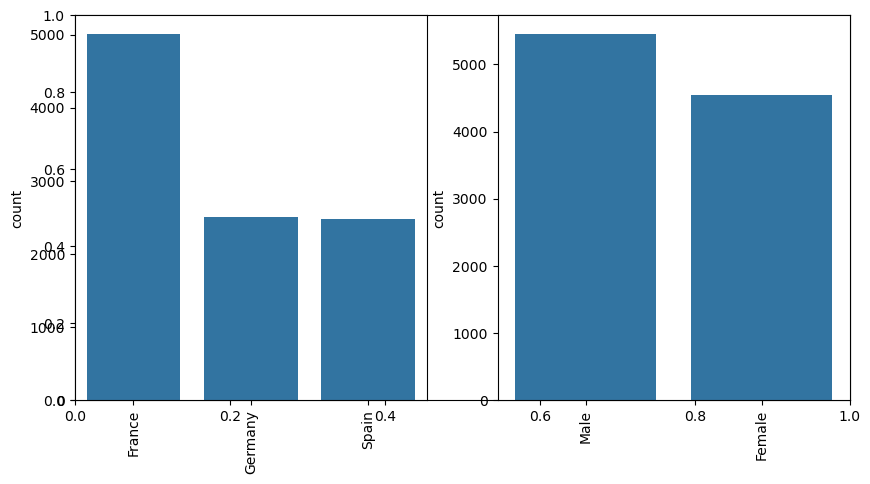

In [6]:
lis2 = ['Geography', 'Gender'] 
plt.subplots(figsize=(10, 5)) 
index = 1
  
for col in lis2: 
    y = dataset[col].value_counts() 
    plt.subplot(1, 2, index) 
    plt.xticks(rotation=90) 
    sns.barplot(x=list(y.index), y=y) 
    index += 1


In [7]:
dataset.isnull().any() 

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [8]:
le = LabelEncoder() 
dataset['Geography'] = le.fit_transform(dataset["Geography"]) 
dataset['Gender'] = le.fit_transform(dataset["Gender"]) 


In [9]:
x = dataset.iloc[:,3:13].values 
y = dataset.iloc[:,13:14].values
x_train, x_test, y_train, y_test = train_test_split(x,y, 
                                                    test_size = 0.2,  
                                                    random_state = 0)
sc = StandardScaler() 
x_train = sc.fit_transform(x_train) 
x_test = sc.fit_transform(x_test)



In [10]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression 
  
from sklearn import metrics 
  
knn = KNeighborsClassifier(n_neighbors=3) 
rfc = RandomForestClassifier(n_estimators = 7, 
                             criterion = 'entropy', 
                             random_state =7) 
svc = SVC() 


In [11]:
lc = LogisticRegression() 
  
# making predictions on the training set 
for clf in (rfc, knn, svc,lc): 
    clf.fit(x_train, y_train) 
    y_pred = clf.predict(x_test) 
    print("Accuracy score of ",clf.__class__.__name__,"=", 
          100*metrics.accuracy_score(y_test, y_pred))


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy score of  RandomForestClassifier = 84.5
Accuracy score of  KNeighborsClassifier = 82.45
Accuracy score of  SVC = 86.15
Accuracy score of  LogisticRegression = 80.80000000000001


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
